# This notebook compares the E0, gA00, and gV00 results of various models 

In [1]:
import numpy as np
import gvar as gv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

In [2]:
import pickle

In [3]:
file_list = np.array([['chained_2pt_3pt_tau1_Final.obj', 'simultaneous_2pt_3pt_tau1_Final.obj'], \
                      ['chained_2pt_3pt_tau2_Final.obj', 'simultaneous_2pt_3pt_tau2_Final.obj'], \
                      ['chained_2pt_3pt_FH_tau1_Final.obj', 'simultaneous_2pt_3pt_FH_tau1_Final.obj'], \
                      ['chained_2pt_3pt_FH_tau2_Final.obj', 'simultaneous_2pt_3pt_FH_tau2_Final.obj'], \
                      ['chained_2pt_3pt_sumsub_tau1_Final.obj', 'simultaneous_2pt_3pt_sumsub_tau1_Final.obj'], \
                      ['chained_2pt_3pt_sumsub_tau2_Final.obj', 'simultaneous_2pt_3pt_sumsub_tau2_Final.obj'], \
                      ['chained_2pt_3pt_sumsub_FH_tau1_Final.obj', 'simultaneous_2pt_3pt_sumsub_FH_tau1_Final.obj'], \
                      ['chained_2pt_3pt_sumsub_FH_tau2_Final.obj', 'simultaneous_2pt_3pt_sumsub_FH_tau2_Final.obj']])



In [4]:
model_list = np.array(["2pt-3pt,tau1", "2pt-3pt,tau2", "2pt-FH-3pt,tau1", "2pt-FH-3pt,tau2", "2pt-ssub-3pt,tau1", "2pt-ssub-3pt,tau2", "2pt-ssub-FH-3pt,tau1", "2pt-ssub-FH-3pt,tau2"])
label_list = np.array(["chained", "simultaneous"])
color_list = np.array(['red', 'blue'])

In [5]:
# This method is copied from StackOverFlow, courtesy of tmdavison (https://stackoverflow.com/questions/37852462/filled-errorbars-in-matplotlib-rectangles/37852631)
def makeErrorBoxes(xdata,ydata,xerror,yerror,fc=None,ec='None',alpha=0.3, legendlabel=None):
    
    if fc is None:
        fc = np.array(['red' for i in xdata])
    
    # Create list for all the error patches
    errorboxes = []

    # Loop over data points; create box from errors at each point
    for xc,yc,xe,ye,ci in zip(xdata,ydata,xerror.T,yerror.T,fc):
        rect = Rectangle((xc-xe[0],yc-ye[0]),xe.sum(),ye.sum())
        errorboxes.append(rect)

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes,alpha=alpha,edgecolor=ec, facecolor=fc, label = legendlabel)
    #if legendlabel is not None:
        #pc.set_label(legendlabel)
    
    # Add collection to axes
    ax.add_collection(pc)
    ax.legend()

In [6]:
# param is the paramg whose results are being sampled, infiles is a list of files from which to get the 
# parameter, and is a 2d array with axis 0 of length the same as len(models) and with axis 1 of length same as len(labels)
def compare(param, infiles, models, labels, colors, ylim, graphtitle, outfile, title_fontsize, axislabel_fontsize, ticklabel_fontsize, legend_fontsize):
    x_vals = np.zeros(len(models))
    x_errs = np.zeros([2,len(models)])
    param_vals = np.zeros([len(models), len(labels)])
    param_errs = np.zeros([2, len(models), len(labels)])
    
    for i in range(len(models)):
        x_vals[i] = i
        x_errs[0][i] = 0.1
        x_errs[1][i] = 0.1
        for j in range(len(labels)):
            posterior_file = open(infiles[i][j], 'rb')
            posteriors = pickle.load(posterior_file)
            posterior_file.close()
            param_vals[i][j] = posteriors[param].mean
            param_errs[0][i][j] = posteriors[param].sdev
            param_errs[1][i][j] = posteriors[param].sdev
            
    xlim_lowerbound = -0.5
    xlim_upperbound = len(models) - 0.5
    
    xtick_nums = np.array([i for i in range(int(x_vals[0]), len(models))])
    xtick_strings = models
    
    ax.set_title(graphtitle, fontsize = title_fontsize)
    ax.set_xticks(xtick_nums)
    ax.set_xticklabels(xtick_strings)
    
    ax.tick_params(axis='x', labelsize= ticklabel_fontsize)
    ax.tick_params(axis='y', labelsize= ticklabel_fontsize)
    
    legend_objects = []
    for j in range(len(labels)):
        parampatch = Line2D([0], [0], linestyle="none", marker="s", alpha=1.0, markersize=10, markerfacecolor=colors[j])
        makeErrorBoxes(x_vals+0.2*j, param_vals[:,j], x_errs, param_errs[:,:,j], fc=[colors[j] for i in range(len(xtick_nums))], legendlabel=labels[j]) 
        legend_objects.append(parampatch)
        
    makeErrorBoxes(x_vals, param_vals[:,0], x_errs, param_errs[:,:,0], fc=['red'], legendlabel=["posterior"])
    plt.legend(legend_objects, labels, loc = 'upper right', fontsize=legend_fontsize)
    ax.set_xlim([xlim_lowerbound, xlim_upperbound])
    ax.set_ylim(ylim)
    
    ax.set_xlabel("fit-samples, tau-cut", fontsize=axislabel_fontsize)
    
    plt.savefig(outfile)
    
    plt.show() 
    
    plt.clf()


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


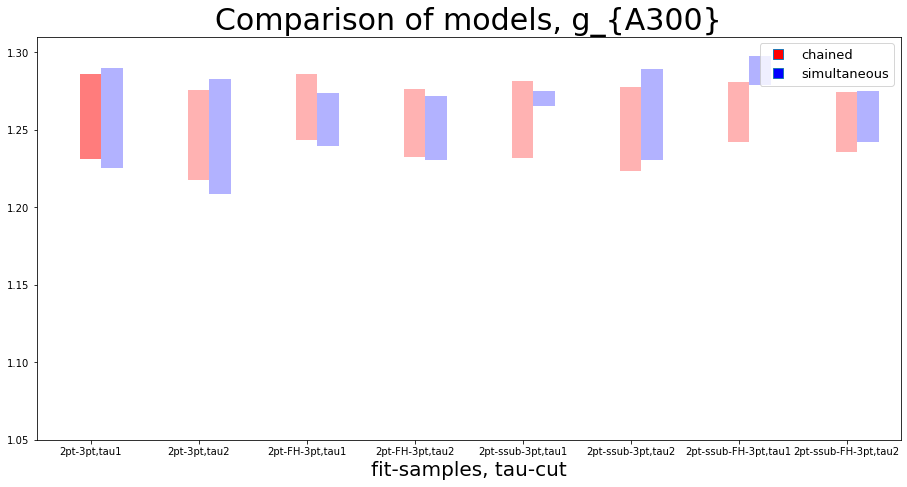

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

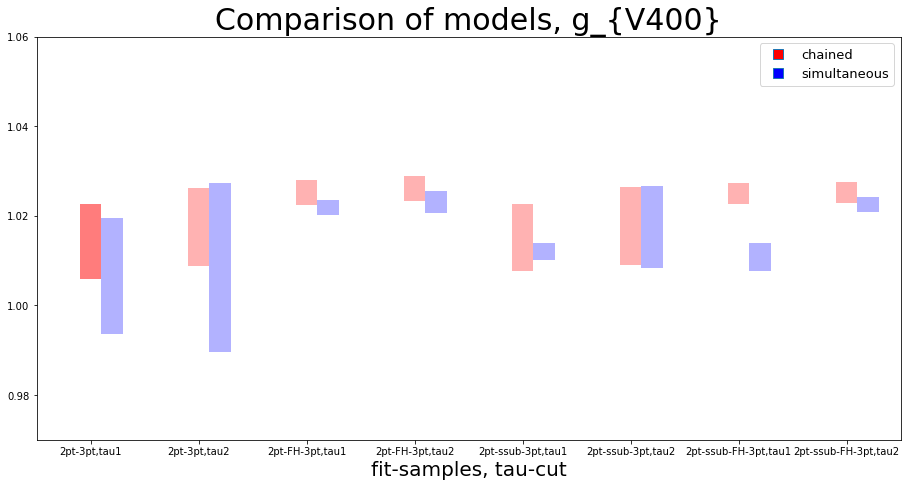

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

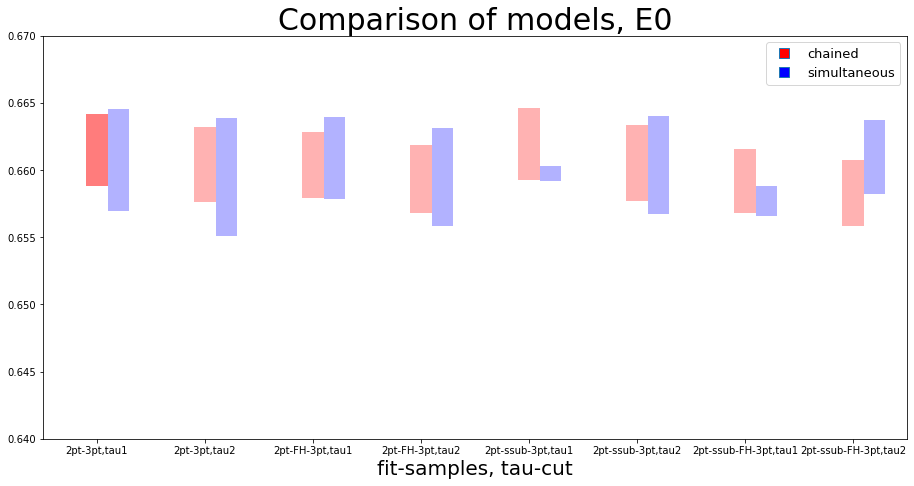

<Figure size 432x288 with 0 Axes>

In [9]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
compare('gA3_00', file_list, model_list, label_list, color_list, [1.05, 1.31], "Comparison of models, g_{A300}", "g_{A300}_modelcomp.png", 30, 20, 10, 13)

fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
compare('gV4_00', file_list, model_list, label_list, color_list, [0.97, 1.06], "Comparison of models, g_{V400}", "g_{V400}_modelcomp.png", 30, 20, 10, 13)

fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
compare('E0', file_list, model_list, label_list, color_list, [0.64, 0.67], "Comparison of models, E0", "E0_modelcomp.png", 30, 20, 10, 13)


In [104]:
# Creates a table to compare values of a certain parameter
# Columns = models; rows = 'labels' (simultaneous vs. chained)
def compare_table(param, infiles, models, labels):
    param_vals = np.zeros([len(models), len(labels)])
    param_errs = np.zeros([len(models), len(labels)])
    
    for i in range(len(models)):
        for j in range(len(labels)):
            posterior_file = open(infiles[i][j], 'rb')
            posteriors = pickle.load(posterior_file)
            posterior_file.close()
            param_vals[i][j] = posteriors[param].mean
            param_errs[i][j] = posteriors[param].sdev
    
    tab_param = {}


    for j in range(len(labels)):
        col_param = []
        for i in range(len(models)):
            col_param.append("{0:.4f}+/-{1:.4f}".format(param_vals[i][j], param_errs[i][j]))
        
        tab_param.update({'{0:s}'.format(labels[j]):col_param})
    
    table = pd.DataFrame(tab_param)

    table.index = models
    print("Table of ", param, " values")
    print(table)

In [105]:
compare_table('gA3_00', file_list, model_list, label_list)

Table of  gA3_00  values
                              chained     simultaneous
2pt-3pt,tau1          1.2169+/-0.0674  1.1752+/-0.1059
2pt-3pt,tau2          1.2169+/-0.0674  1.1712+/-0.0916
2pt-FH-3pt,tau1       1.2542+/-0.0080  1.2438+/-0.0041
2pt-FH-3pt,tau2       1.2237+/-0.0118  1.2521+/-0.0085
2pt-ssub-3pt,tau1     1.2681+/-0.0309  1.2662+/-0.0049
2pt-ssub-3pt,tau2     1.2292+/-0.0134  1.1875+/-0.1041
2pt-ssub-FH-3pt,tau1  1.2652+/-0.0070  1.2724+/-0.0080
2pt-ssub-FH-3pt,tau2  1.2350+/-0.0124  1.2021+/-0.0427


In [106]:
compare_table('gV4_00', file_list, model_list, label_list)

Table of  gV4_00  values
                              chained     simultaneous
2pt-3pt,tau1          1.0251+/-0.0195  1.0271+/-0.0263
2pt-3pt,tau2          1.0251+/-0.0195  0.9961+/-0.0169
2pt-FH-3pt,tau1       1.0199+/-0.0007  1.0178+/-0.0004
2pt-FH-3pt,tau2       1.0188+/-0.0014  1.0202+/-0.0008
2pt-ssub-3pt,tau1     1.0119+/-0.0054  1.0132+/-0.0016
2pt-ssub-3pt,tau2     1.0128+/-0.0035  1.0027+/-0.0186
2pt-ssub-FH-3pt,tau1  1.0197+/-0.0007  1.0114+/-0.0018
2pt-ssub-FH-3pt,tau2  1.0198+/-0.0014  1.0131+/-0.0044


In [107]:
compare_table('E0', file_list, model_list, label_list)

Table of  E0  values
                              chained     simultaneous
2pt-3pt,tau1          0.6600+/-0.0038  0.6576+/-0.0071
2pt-3pt,tau2          0.6600+/-0.0038  0.6510+/-0.0092
2pt-FH-3pt,tau1       0.6609+/-0.0034  0.6613+/-0.0028
2pt-FH-3pt,tau2       0.6596+/-0.0022  0.6561+/-0.0056
2pt-ssub-3pt,tau1     0.6617+/-0.0034  0.6605+/-0.0008
2pt-ssub-3pt,tau2     0.6593+/-0.0023  0.6519+/-0.0099
2pt-ssub-FH-3pt,tau1  0.6615+/-0.0035  0.6589+/-0.0009
2pt-ssub-FH-3pt,tau2  0.6599+/-0.0022  0.6611+/-0.0034


## Now, try with the tau2-only model, num of states 4 for 2pt-3pt, 3 for FH

In [10]:
file_list_tau2only = np.array([['chained_2pt_3pt_tau2only_Final.obj', 'simultaneous_2pt_3pt_tau2only_Final.obj'], \
                      ['chained_2pt_3pt_FH_tau2only_Final.obj', 'simultaneous_2pt_3pt_FH_tau2only_Final.obj'], \
                      ['chained_2pt_3pt_sumsub_tau2only_Final.obj', 'simultaneous_2pt_3pt_sumsub_tau2only_Final.obj'], \
                      ['chained_2pt_3pt_sumsub_FH_tau2only_Final.obj', 'simultaneous_2pt_3pt_sumsub_FH_tau2only_Final.obj']])

model_list_tau2only = np.array(["2pt-3pt", "2pt-FH-3pt", "2pt-ssub-3pt", "2pt-ssub-FH-3pt"])
label_list = np.array(["chained", "simultaneous"])
color_list = np.array(['red', 'blue'])

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


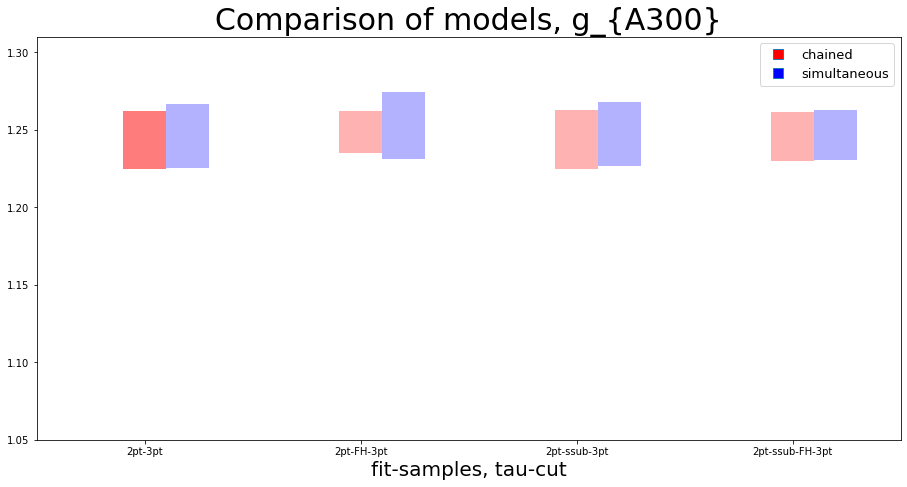

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

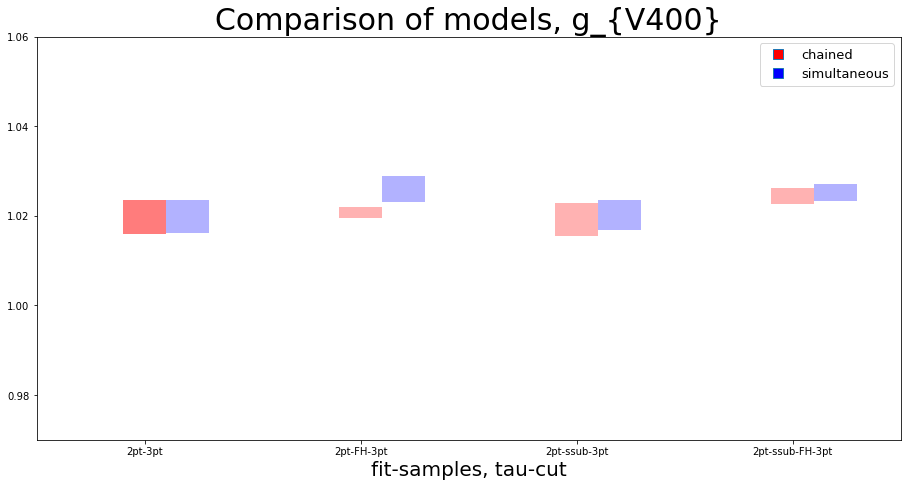

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

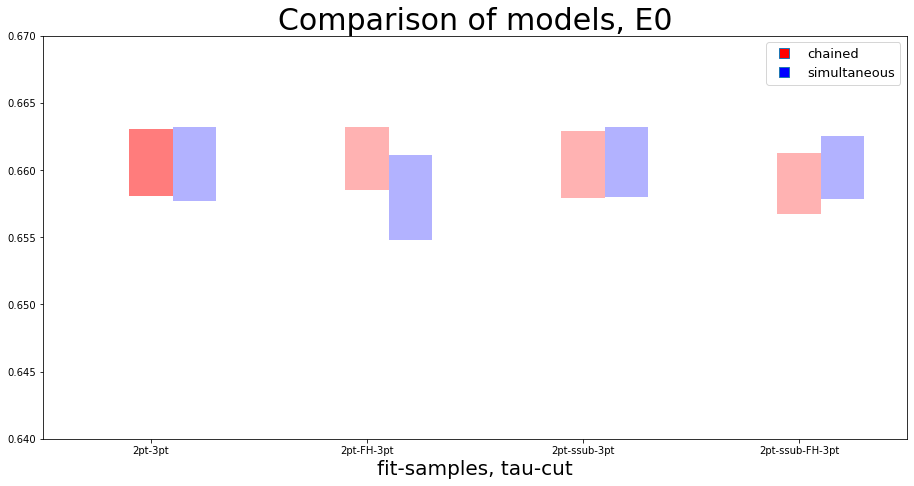

<Figure size 432x288 with 0 Axes>

In [11]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
compare('gA3_00', file_list_tau2only, model_list_tau2only, label_list, color_list, [1.05, 1.31], "Comparison of models, g_{A300}", "g_{A300}_modelcomp.png", 30, 20, 10, 13)

fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
compare('gV4_00', file_list_tau2only, model_list_tau2only, label_list, color_list, [0.97, 1.06], "Comparison of models, g_{V400}", "g_{V400}_modelcomp.png", 30, 20, 10, 13)

fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
compare('E0', file_list_tau2only, model_list_tau2only, label_list, color_list, [0.64, 0.67], "Comparison of models, E0", "E0_modelcomp.png", 30, 20, 10, 13)



In [105]:
compare_table('gA3_00', file_list, model_list, label_list)

Table of  gA3_00  values
                              chained     simultaneous
2pt-3pt,tau1          1.2169+/-0.0674  1.1752+/-0.1059
2pt-3pt,tau2          1.2169+/-0.0674  1.1712+/-0.0916
2pt-FH-3pt,tau1       1.2542+/-0.0080  1.2438+/-0.0041
2pt-FH-3pt,tau2       1.2237+/-0.0118  1.2521+/-0.0085
2pt-ssub-3pt,tau1     1.2681+/-0.0309  1.2662+/-0.0049
2pt-ssub-3pt,tau2     1.2292+/-0.0134  1.1875+/-0.1041
2pt-ssub-FH-3pt,tau1  1.2652+/-0.0070  1.2724+/-0.0080
2pt-ssub-FH-3pt,tau2  1.2350+/-0.0124  1.2021+/-0.0427


In [106]:
compare_table('gV4_00', file_list, model_list, label_list)

Table of  gV4_00  values
                              chained     simultaneous
2pt-3pt,tau1          1.0251+/-0.0195  1.0271+/-0.0263
2pt-3pt,tau2          1.0251+/-0.0195  0.9961+/-0.0169
2pt-FH-3pt,tau1       1.0199+/-0.0007  1.0178+/-0.0004
2pt-FH-3pt,tau2       1.0188+/-0.0014  1.0202+/-0.0008
2pt-ssub-3pt,tau1     1.0119+/-0.0054  1.0132+/-0.0016
2pt-ssub-3pt,tau2     1.0128+/-0.0035  1.0027+/-0.0186
2pt-ssub-FH-3pt,tau1  1.0197+/-0.0007  1.0114+/-0.0018
2pt-ssub-FH-3pt,tau2  1.0198+/-0.0014  1.0131+/-0.0044


In [107]:
compare_table('E0', file_list, model_list, label_list)

Table of  E0  values
                              chained     simultaneous
2pt-3pt,tau1          0.6600+/-0.0038  0.6576+/-0.0071
2pt-3pt,tau2          0.6600+/-0.0038  0.6510+/-0.0092
2pt-FH-3pt,tau1       0.6609+/-0.0034  0.6613+/-0.0028
2pt-FH-3pt,tau2       0.6596+/-0.0022  0.6561+/-0.0056
2pt-ssub-3pt,tau1     0.6617+/-0.0034  0.6605+/-0.0008
2pt-ssub-3pt,tau2     0.6593+/-0.0023  0.6519+/-0.0099
2pt-ssub-FH-3pt,tau1  0.6615+/-0.0035  0.6589+/-0.0009
2pt-ssub-FH-3pt,tau2  0.6599+/-0.0022  0.6611+/-0.0034
